## 第一章~第二章：机器学习简介及线性回归 进阶作业


## 1. 数据探索

In [1]:
# -*- coding:utf-8 -*-
import pandas as pd  #
import seaborn as sns
import matplotlib.pyplot as plt 

dapath = '../dataset/'  # 数据文件路径

cb = pd.read_csv(dapath + 'day.csv')  # 以csv格式读取数据
# print "cb　data type is %s" % cb.dtypes  # 输出各字段数据类型
#cb.head()  # 打印文件头部内容，查看各字段前五列数据值
#cb.tail()  # 打印数据尾部五个数据值
%matplotlib inline

IOError: File ../dataset/day.csv does not exist

In [10]:
cb.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [37]:
cb.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,2729


各项数据都已经处理过。

In [11]:
#　查看是否有空值
cb.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
print cb.describe()  # 描述各字段属性统计

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

## 单变量分布分析
对单个变量，用直方图、箱体图等查看其大致分布，是否存在噪声数据点

In [14]:
# 目标cnt（给定日期（day.csv）总租车人数）的直方图分布

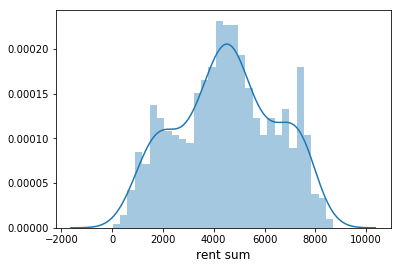

In [16]:
fig = plt.figure()
sns.distplot(cb['cnt'], bins=30, kde=True)
plt.xlabel('rent sum', fontsize=12)
plt.show()

1    500
0    231
Name: workingday, dtype: int64

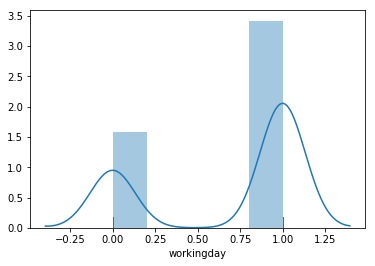

In [24]:
# 查看工作日和非工作日分布
sns.distplot(cb['workingday'], kde=True, rug=True)
cb['workingday'].value_counts()

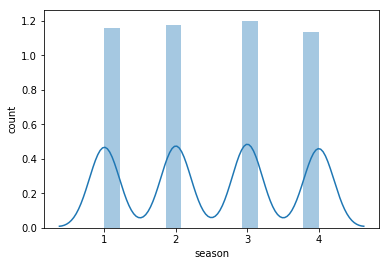

In [28]:
# 查看季节分布
fig = plt.figure()
sns.distplot(cb['season'])
plt.xlabel('season')
plt.ylabel('count')
plt.show()

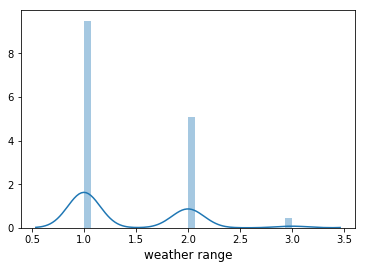

In [30]:
# 查看天气分布
fig = plt.figure()
sns.distplot(cb['weathersit'], bins=30, kde=True)
plt.xlabel('weather range', fontsize=12)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3326c770d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f33238e2590>]], dtype=object)

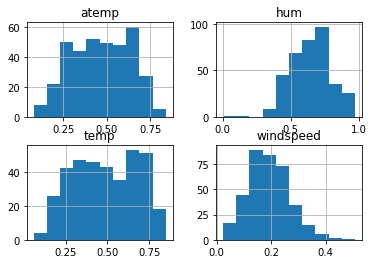

In [5]:
num_f = ['temp', 'atemp', 'hum', 'windspeed']
test_data[num_f].hist()

## 查看相关性

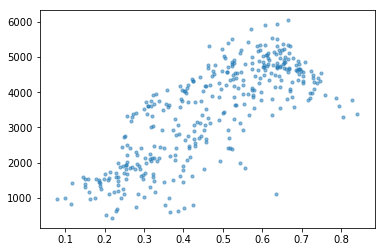

In [18]:
# 总租车人数和体感温度之间关系

plt.scatter(test_data['atemp'], test_data['cnt'], s=10, alpha=.5)


In [19]:
#get names of all the columns
cols = cb.columns

# calculate pearson co-efficient for all combinations
data_corr = test_data.corr().abs()

data_corr.shape

(15, 15)

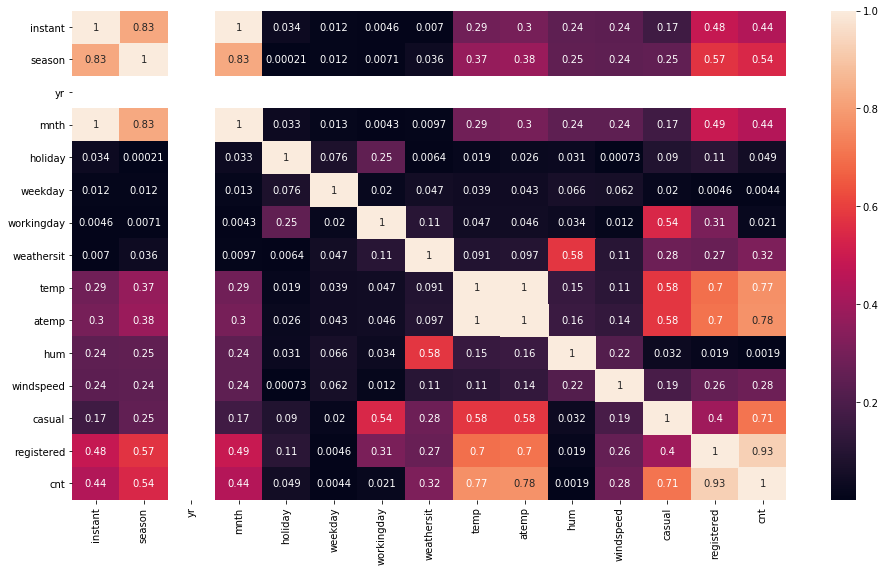

In [20]:
plt.subplots(figsize=(16,9))
sns.heatmap(data_corr, annot=True)

sns.heatmap(data_corr, mask=data_corr < 1, cbar=False)

plt.savefig('bike share_corr.png')
plt.show()


In [21]:
# set the threshold to select only highly correlated attributes
threshold = 0.5
# list of pairs along with correlation above threshold
corr_list = []
size = data_corr.shape[0]

# search for the highly correlated paris
for i in range(0, size):
    for j in range(i+1, size):
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1):
            corr_list.append([data_corr.iloc[i,j],i,j])
            
# sort to show higher ones first
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#print corelations and column names
for v,i,j in s_corr_list:
    print ('%s and %s = %.2f' % (cols[i],cols[j],v))

instant and yr = 1.00
weathersit and temp = 1.00
casual and registered = 0.93
dteday and yr = 0.83
instant and dteday = 0.83
temp and registered = 0.78
weathersit and registered = 0.77
windspeed and registered = 0.71
temp and casual = 0.70
weathersit and casual = 0.70
workingday and atemp = 0.58
temp and windspeed = 0.58
weathersit and windspeed = 0.58
dteday and casual = 0.57
dteday and registered = 0.54
weekday and windspeed = 0.54


# 2.特征工程

## 2.1 数据分离

In [36]:
# 从原始数据中删除无用特征
cb = cb.drop({'casual', 'registered'}, axis=1)

### 2.2 离散型特征编码

In [63]:
# 需要对weekday/weathersit/month独热编码
from sklearn.preprocessing import OneHotEncoder
 
# weekday    
wkd = cb['weathersit']

wkd_ohe =  OneHotEncoder(sparse=False).fit(wkd.values.reshape(-1,1))

wkd_ohe

OneHotEncoder(categorical_features='all', dtype=<type 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)

In [65]:
ohe_wkd = wkd_ohe.transform(wkd.values.reshape(-1,1))

ohe_wkd.astype(int)



array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       ..., 
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [66]:
cb.head()

#cb['weekday'].astype('object')
#x_cat = cb['weekday']

#x_cat = pd.get_dummies(cb['weekday'], prefix='weekday')

#cb = cb.drop('weekday', axis=1)



,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,2011-01-04,1,0,1,0,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,2011-01-05,1,0,1,0,1,1,0.226957,0.229270,0.436957,0.186900,1600
